In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Scatterplot Cost Model

In [135]:
from numpy import dtype
cardinality = {
 'dummyfloat1': 1,
 'dummyfloat2': 1,
 'id': 48895,
 'name': 47906,
 'host_id': 37457,
 'host_name': 11453,
 'neighbourhood_group': 5,
 'neighbourhood': 221,
 'latitude': 19048,
 'longitude': 14718,
 'room_type': 3,
 'price': 674,
 'minimum_nights': 109,
 'number_of_reviews': 394,
 'last_review': 1765,
 'reviews_per_month': 938,
 'calculated_host_listings_count': 47,
 'availability_365': 366}
dtype = {'id': dtype('int64'),
 'name': dtype('O'),
 'host_id': dtype('int64'),
 'host_name': dtype('O'),
 'neighbourhood_group': dtype('O'),
 'neighbourhood': dtype('O'),
 'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'dummyfloat1': dtype('float64'),
 'dummyfloat2': dtype('float64'),
 'room_type': dtype('O'),
 'price': dtype('int64'),
 'minimum_nights': dtype('int64'),
 'number_of_reviews': dtype('int64'),
 'last_review': dtype('O'),
 'reviews_per_month': dtype('float64'),
 'calculated_host_listings_count': dtype('int64'),
 'availability_365': dtype('int64')}

In [143]:
df = pd.read_csv("../result/costmodel_scatter.csv")
# df["id"]=df["attr1"]+";"+df["attr2"]
# df = df[df["id"]!="latitude;longitude"]

In [144]:
df["G_color1"] = df["attr1"].apply(lambda x: cardinality[x])
df["dtype1"] = df["attr1"].apply(lambda x: str(dtype[x]))
df["G_color2"] = df["attr2"].apply(lambda x: cardinality[x])
df["dtype2"] = df["attr2"].apply(lambda x: str(dtype[x]))

In [145]:
x = np.array(df["nPts"])
y = np.array(df["time"])*1000
coeff, residuals, rank, singular_values, rcond = np.polyfit(x,y,1,full=True)

In [146]:
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [4.21957543e-06 2.04814359e+00]
error: 4818.2329839486465


In [147]:
# import altair as alt

# alt.Chart(df).mark_circle().encode(
#     y = "time",
#     x = "nPts",
#     color = alt.Color("id",type="nominal"),
# ).interactive()

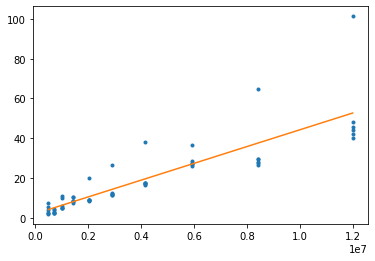

In [148]:
a = coeff[0]
b = coeff[1]
y_pred = a*x+b
plt.plot(x,y,'.')
plt.plot(x,y_pred,'-')

When moving float columns around, e.g. longitude/latitude, each scatterplot takes slightly longer

In [165]:
df = pd.read_csv("../result/costmodel_scatter.csv")
df["id"]=df["attr1"]+";"+df["attr2"]
df = df[(df["id"]=="latitude;longitude")|(df["id"]=="dummyfloat1;dummyfloat2")]

In [166]:
x = np.array(df["nPts"])
y = np.array(df["time"])*1000
coeff, residuals, rank, singular_values, rcond = np.polyfit(x,y,1,full=True)

In [167]:
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [5.78831507e-06 1.01752574e+00]
error: 2811.4378326142005


In [168]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("id",type="nominal"),
).interactive()

alt.Chart(...)

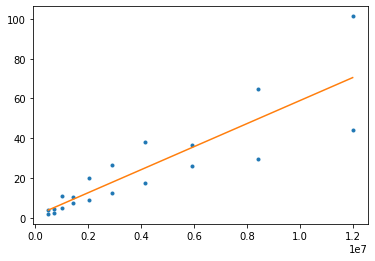

In [152]:
a = coeff[0]
b = coeff[1]
y_pred = a*x+b
plt.plot(x,y,'.')
plt.plot(x,y_pred,'-')

### Only look at "price;minimum_number_of_nights"

In [156]:
df = pd.read_csv("../result/costmodel_scatter.csv")
df["id"]=df["attr1"]+";"+df["attr2"]

In [158]:
df = df[df["id"]=="price;minimum_nights"]

In [161]:
x = np.array(df["nPts"])
y = np.array(df["time"])*1000
coeff, residuals, rank, singular_values, rcond = np.polyfit(x,y,1,full=True)

In [163]:
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [3.19575489e-06 4.19525116e+00]
error: 48.05525258598962


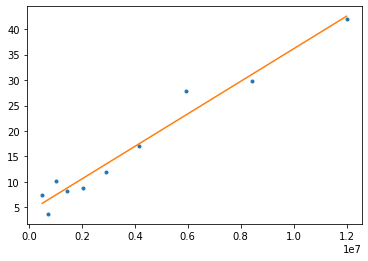

In [162]:
a = coeff[0]
b = coeff[1]
y_pred = a*x+b
plt.plot(x,y,'.')
plt.plot(x,y_pred,'-')

### Colored Scatterplot Cost Model

In [12]:
df = pd.read_csv("../result/costmodel_colorscatter.csv")

In [15]:
# df = pd.read_csv("../../lux-datasets/data/airbnb_nyc.csv")

# lux.config.heatmap = False
# from lux.vis.Vis import Vis
# for attr in ['host_id', 'host_name', 'neighbourhood_group','neighbourhood', 'room_type', 'number_of_reviews']:
#     vis = Vis(['price','minimum_nights',lux.Clause(attr,channel="color")], df)
#     vis._repr_html_()

In [16]:
airbnb = pd.read_csv("../../lux-datasets/data/airbnb_nyc.csv")

In [21]:
# df = pd.read_csv("../../lux-datasets/data/airbnb_nyc.csv")

In [22]:
df["G_color"] = df["attr"].apply(lambda x: cardinality[x])
df["dtype"] = df["attr"].apply(lambda x: str(dtype[x]))

In [50]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_color",type="nominal"),
).interactive()

alt.Chart(...)

### Object dtype

In [91]:
df = pd.read_csv("../result/costmodel_colorscatter.csv")
df["G_color"] = df["attr"].apply(lambda x: cardinality[x])
df["dtype"] = df["attr"].apply(lambda x: str(dtype[x]))
df = df[df["dtype"]!="int64"]

In [92]:
y = np.array(df["time"])*1000
N = np.array(df["nPts"])
G_color = np.array(df["G_color"])
X = np.array([N,G_color])

from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

popt, pcov = curve_fit(func, X,y)
popt

array([ 3.30550323e+00,  1.59183456e-05,  8.15864091e-10, -3.46044528e-04])

In [93]:
y_pred = func(X,*popt)

In [94]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 8.783206268301111


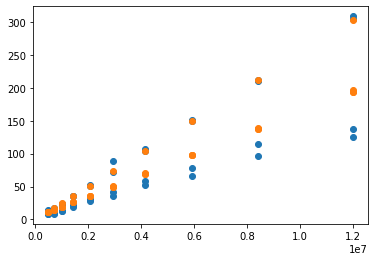

In [95]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Int dtype

In [96]:
df = pd.read_csv("../result/costmodel_colorscatter.csv")
df["G_color"] = df["attr"].apply(lambda x: cardinality[x])
df["dtype"] = df["attr"].apply(lambda x: str(dtype[x]))
df = df[df["dtype"]=="int64"]

In [99]:
y = np.array(df["time"])*1000
N = np.array(df["nPts"])
G_color = np.array(df["G_color"])
X = np.array([N,G_color])

from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

popt, pcov = curve_fit(func, X,y)
popt

array([ 2.27828870e+00,  6.04242891e-06,  1.58974871e-10, -1.74858426e-04])

In [100]:
y_pred = func(X,*popt)

In [101]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 2.543494123709982


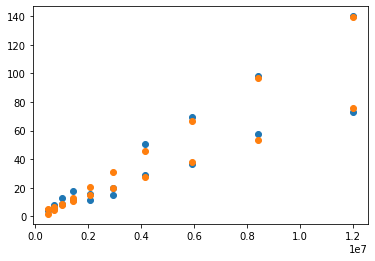

In [103]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Bar Chart Cost model 

In [83]:
df = pd.read_csv("../result/costmodel_bar.csv")
df["time"] = df["time"]*1000
bar = df[(df["G_color"]==0)]

In [84]:
import altair as alt

alt.Chart(bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_axes",type="nominal"),
)

alt.Chart(...)

In [85]:
N = np.array(bar["nPts"])
G_axes = np.array(bar["G_axes"])
y = np.array(bar["time"])
X = np.array([N,G_axes])

In [86]:
from scipy.optimize import curve_fit
def func(x, a, b,c,d):
    return a + b * x[0] +c*x[0]*x[1] + d*x[1]

In [87]:
popt, pcov = curve_fit(func, X,y)
popt

array([2.08279455e+01, 9.89765486e-05, 7.74048323e-09, 2.85891386e-03])

In [88]:
y_pred = func(X,*popt)

In [89]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 91.38983743491983


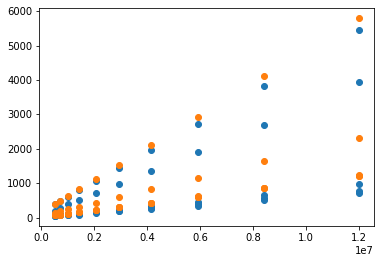

In [92]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Color Bar Chart Cost Model


In [93]:
df = pd.read_csv("../result/costmodel_colorbar.csv")
df["time"] = df["time"]*1000
color_bar = df[(df["G_color"]!=0)]

In [94]:
color_bar["ga*gc"]=color_bar["G_axes"]*color_bar["G_color"]

In [95]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_axes",type="nominal")
)

alt.Chart(...)

In [96]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("G_color",type="nominal")
).interactive()

alt.Chart(...)

In [97]:
alt.Chart(color_bar).mark_circle().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("ga*gc",type="nominal")
).interactive()

alt.Chart(...)

In [98]:
N = np.array(color_bar["nPts"])
G_axes = np.array(color_bar["G_axes"])
G_color = np.array(color_bar["G_color"])
y = np.array(color_bar["time"])
X = np.array([N,G_axes,G_color])

In [99]:
from scipy.optimize import curve_fit
def func(x, a, b,c,d,e,f,g):
    return a + b * x[0] + c*x[1]+ d*x[2] +e*x[0]*x[1] + f*x[1]*x[2]  + g*x[0]*x[2]

In [100]:
popt, pcov = curve_fit(func, X,y)
popt

array([ 3.71161713e+01,  1.27866029e-04,  2.01123956e-02, -1.81489405e-02,
        2.21736120e-08,  1.88026625e-03,  2.29023360e-08])

In [101]:
y_pred = func(X,*popt)

In [102]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 40.59561254465439


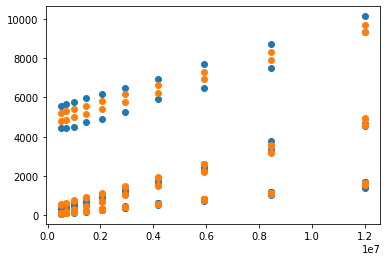

In [103]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

### Histogram 

In [104]:
import altair as alt

In [105]:
df = pd.read_csv("../result/costmodel_histogram.csv")
df["time"] = df["time"]*1000

In [106]:
alt.Chart(df).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbin",type="ordinal")
)

alt.Chart(...)

In [107]:
N = np.array(df["nPts"])
Nbin = np.array(df["nbin"])
y = np.array(df["time"])
X = np.array([N,Nbin])

In [108]:
from scipy.optimize import curve_fit
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1] #+ d*x[0]*x[1]

In [109]:
popt, pcov = curve_fit(func, X,y)
popt

array([ 4.36379731e+00,  1.53415317e-05, -1.96817326e-02])

In [110]:
y_pred = func(X,*popt)

In [111]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 1.645726335000626


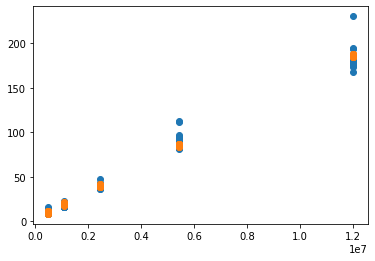

In [112]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

In [113]:
# Verify that coefficient value is the same with linear fitting
coeff, residuals, rank, singular_values, rcond = np.polyfit(N,y,1,full=True)
print ("Coefficients:",coeff)
print ("error:",residuals[0])

Coefficients: [1.53415316e-05 2.39562438e+00]
error: 5253.032837455612


Histogram processing speed has no dependence on the number of bins

###  Heatmap Cost Model

In [114]:
df = pd.read_csv("../result/costmodel_heatmap.csv")
df["time"] = df["time"]*1000
df.nbin = df.nbin.astype(int)

In [115]:
alt.Chart(df).mark_line().encode(
    y = "time",
    x = "nPts",
    color = alt.Color("nbin",type="ordinal"),
    row="mark"
)

alt.Chart(...)

In [116]:
vdf = df[df["mark"]=="heatmap"]

In [117]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])

In [118]:
from scipy.optimize import curve_fit
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1]

In [119]:
popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [5.07470064e+01 9.55437912e-05 1.36897843e-02]


In [120]:
y_pred = func(X,*popt)

In [121]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 3.2573058382160025


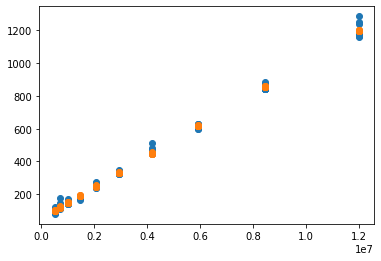

In [123]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

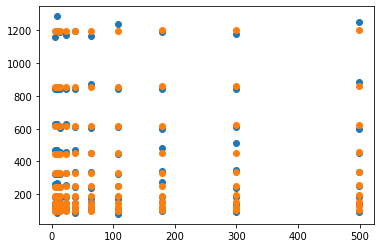

In [124]:
dim = 1
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

- Heatmap processing time is also not very dependent on number of bins/cells. It is also not strongly dependent on the number of data points since the data has already been binned into fixed number of cells

In [125]:
vdf = df[df["mark"]=="categorical color heatmap"]

In [126]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1]# + d * x[0]*x[1]

In [127]:
popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [1.22412562e+02 2.69503900e-04 3.30109590e-03]


In [128]:
y_pred = func(X,*popt)

In [129]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 8.829847880069996


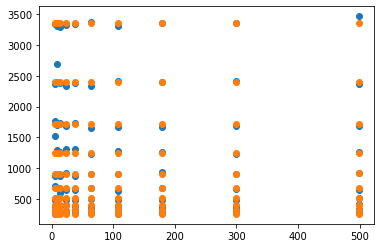

In [130]:
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')

In [131]:
vdf = df[df["mark"]=="quantitative color heatmap"]

In [132]:
N = np.array(vdf["nPts"])
# Ncells = np.array(vdf["nbin"]**2)
Nbins = np.array(vdf["nbin"])
y = np.array(vdf["time"])
X = np.array([N,Nbins])
def func(x, a, b,c):
    return a + b * x[0]+ c*x[1]# + d * x[0]*x[1]

popt, pcov = curve_fit(func, X,y)
print ("coefficient:", popt)

coefficient: [ 1.20181577e+02  1.13792537e-04 -2.36860258e-01]


In [133]:
y_pred = func(X,*popt)

In [134]:
perr = np.sqrt(np.diag(pcov))
print ("error:", sum(perr))

error: 26.97405146276705


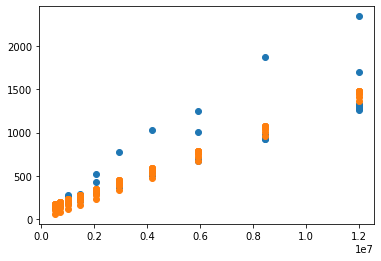

In [135]:
dim = 0
plt.plot(X[dim],y,'o')
plt.plot(X[dim],func(X,*popt),'o')